In [34]:
import pandas as pd

# Load your updated dataset
df = pd.read_csv('top100_nba_2025_ranked_stats.csv')

In [35]:
features = ['WS', 'BPM', 'PPG']
target = 'OVR'

df = df.dropna(subset=features + [target])
X = df[features]
y = df[target]


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R^2 score: 0.7037943734462768
MSE: 5.616058679458592


In [37]:
import statsmodels.api as sm

X_const = sm.add_constant(X)  # Add intercept
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    OVR   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     113.3
Date:                Thu, 01 May 2025   Prob (F-statistic):           2.01e-31
Time:                        17:03:31   Log-Likelihood:                -206.62
No. Observations:                 100   AIC:                             421.2
Df Residuals:                      96   BIC:                             431.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.8205      0.965     78.537      0.0

In [38]:
# Predict 2K ratings for the whole dataset
df['Predicted_OVR'] = model.predict(X)

# Residual = Predicted - Actual
df['Residual'] = df['Predicted_OVR'] - df['OVR']

# Sort players
underrated = df.sort_values(by='Residual', ascending=False).head(10)  # IRL stats better than 2K rating
overrated = df.sort_values(by='Residual').head(10)                    # 2K rating better than IRL stats

# Display
print("🔥 Most Underrated Players (should have higher 2K rating):")
print(underrated[['Player', 'OVR', 'Predicted_OVR', 'Residual']])

print("\n🚨 Most Overrated Players (rating > real impact):")
print(overrated[['Player', 'OVR', 'Predicted_OVR', 'Residual']])


🔥 Most Underrated Players (should have higher 2K rating):
                     Player  OVR  Predicted_OVR  Residual
92            Miles Bridges   83      86.883835  3.883835
76               Cam Thomas   84      87.555240  3.555240
89             R.J. Barrett   83      86.482864  3.482864
40             Tyrese Maxey   87      90.175024  3.175024
78           Nikola Vucevic   84      87.173196  3.173196
81          Cameron Johnson   84      87.160999  3.160999
2   Shai Gilgeous-Alexander   98     100.993962  2.993962
83          Trey Murphy III   84      86.865435  2.865435
97         Payton Pritchard   83      85.774280  2.774280
29          Zion Williamson   89      91.690773  2.690773

🚨 Most Overrated Players (rating > real impact):
              Player  OVR  Predicted_OVR  Residual
4       LeBron James   96      91.885423 -4.114577
11       Joel Embiid   93      89.213755 -3.786245
19      Jaylen Brown   91      87.270909 -3.729091
90   Andrew Nembhard   83      79.382872 -3.617128

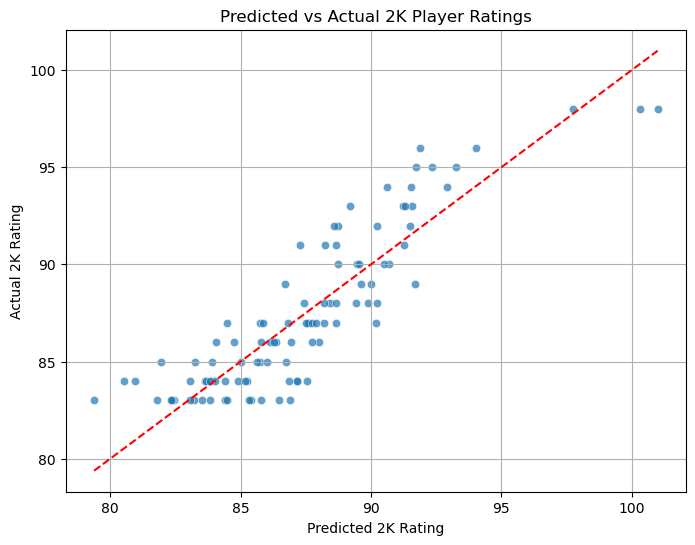

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Predicted_OVR'], y=df['OVR'], alpha=0.7)
plt.plot([df['Predicted_OVR'].min(), df['Predicted_OVR'].max()],
         [df['Predicted_OVR'].min(), df['Predicted_OVR'].max()],
         color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Predicted 2K Rating")
plt.ylabel("Actual 2K Rating")
plt.title("Predicted vs Actual 2K Player Ratings")
plt.grid(True)
plt.show()


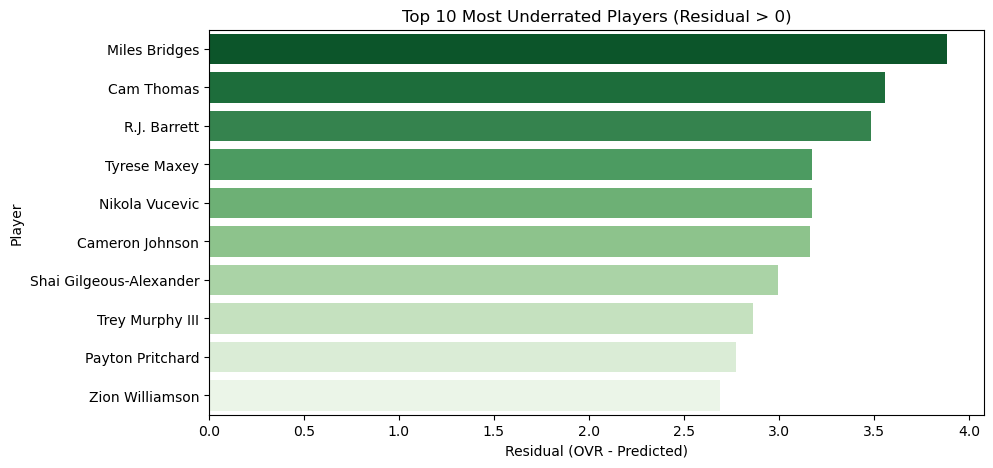

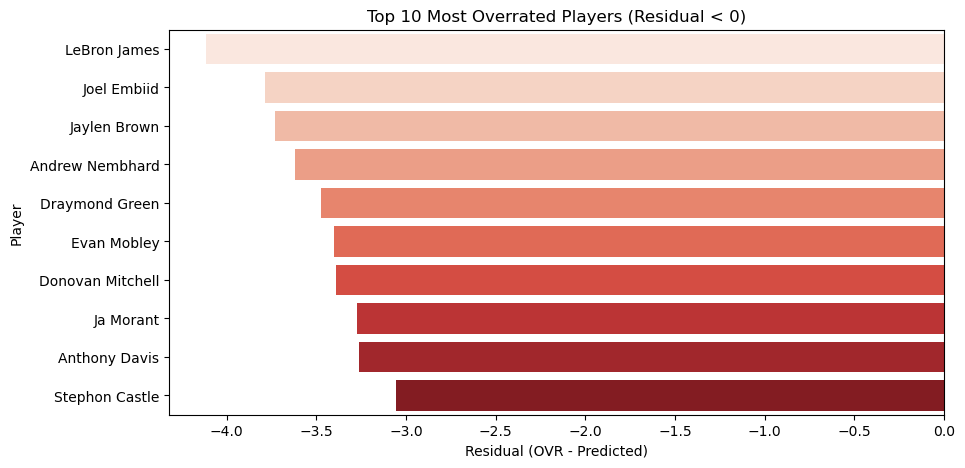

In [40]:
# Bar plot for top 10 underrated
plt.figure(figsize=(10, 5))
sns.barplot(data=underrated, x='Residual', y='Player', hue='Player', palette='Greens_r', legend=False)
plt.title("Top 10 Most Underrated Players (Residual > 0)")
plt.xlabel("Residual (OVR - Predicted)")
plt.ylabel("Player")
plt.show()

# Bar plot for top 10 overrated
plt.figure(figsize=(10, 5))
sns.barplot(data=overrated, x='Residual', y='Player', hue='Player', palette='Reds', legend=False)
plt.title("Top 10 Most Overrated Players (Residual < 0)")
plt.xlabel("Residual (OVR - Predicted)")
plt.ylabel("Player")
plt.show()


In [41]:
df.to_csv("nba2k25_ratings_analysis.csv", index=False)
